In [19]:
import cv2 
import matplotlib.pyplot as plt

In [20]:
img1 = cv2.imread("images/PIC_A.png", 0)
img2 = cv2.imread("images/PIC_B.png", 0)

In [21]:
# SIFT Feature Detection and Matching
sift = cv2.SIFT_create()

In [22]:
# detect keypoints and descriptors
kp1_sift, des1_sift = sift.detectAndCompute(img1, None)
kp2_sift, des2_sift = sift.detectAndCompute(img2, None)

In [23]:
# Brute-Force Matcher (L2 norm for SIFT)
bf_sift = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches_sift = bf_sift.match(des1_sift, des2_sift)

In [24]:
# sort mathces by distnace (best mathces first)
matches_sift = sorted(matches_sift, key=lambda x: x.distance)

In [25]:
# Draw top matches
sift_results = cv2.drawMatches(img1, kp1_sift, img2, kp2_sift, 
                               matches_sift[:30], None, flags=2)

In [26]:
# ORB Feature Detection and Matching
orb = cv2.ORB_create()

In [27]:
# Detect Keypoints and descriptors
kp1_orb, des1_orb = orb.detectAndCompute(img1, None)
kp2_orb, des2_orb = orb.detectAndCompute(img2, None)

In [44]:
# Brute Force Matcher (Hamming distance for ORB)
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
matches_orb = bf_orb.match(des1_orb, des2_orb)

# sort mathces by distnace
matches_orb = sorted(matches_orb, key=lambda x: x.distance)

# Draw top matches
orb_result = cv2.drawMatches(img1, kp1_orb, img2, kp2_orb, matches_orb, None)

(np.float64(-0.5), np.float64(5759.5), np.float64(1799.5), np.float64(-0.5))

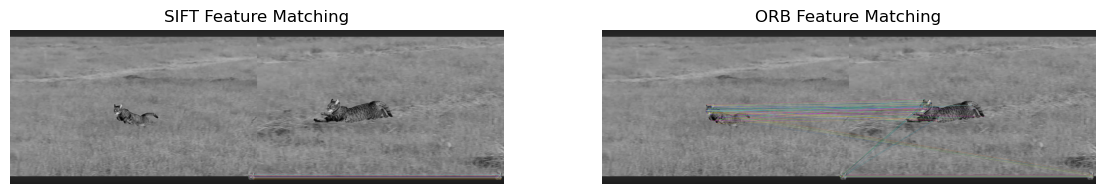

In [45]:
# Display Results
plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
plt.imshow(sift_results)
plt.title('SIFT Feature Matching')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(orb_result)
plt.title('ORB Feature Matching')
plt.axis('off')